<a href="https://colab.research.google.com/github/victorsantanaa/imersaoDadosAlura/blob/main/Desafio_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios Aula 03 - Imersão em Dados Alura 2

Resolução realizada por [Victor Santana](https://github.com/victorsantanaa)

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.gridspec as gridspec
import numpy as np

 
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
 
dados = pd.read_csv(fonte)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

##Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)


In [43]:
def graph_with_MMM(data, x_axis):


  mean = data[x_axis].mean()
  median = data[x_axis].median()
  mode = data[x_axis].mode()[0]
  plt.figure(figsize=(12,8))
  graph = sns.histplot(data, x=x_axis)

  graph.vlines(x= data[x_axis].mean(), color="red", label='Media {:.1f}'.format(mean), ymin = 0, ymax=3000 )
  graph.vlines(x= data[x_axis].median(), color = 'yellow', label='Mediana {:.1f}'.format(median), ymin = 0, ymax=3000)
  graph.vlines(x= data[x_axis].mode(), color = 'black', label='Moda {:.1f}'.format(mode), ymin = 0, ymax=3000)

  plt.legend()



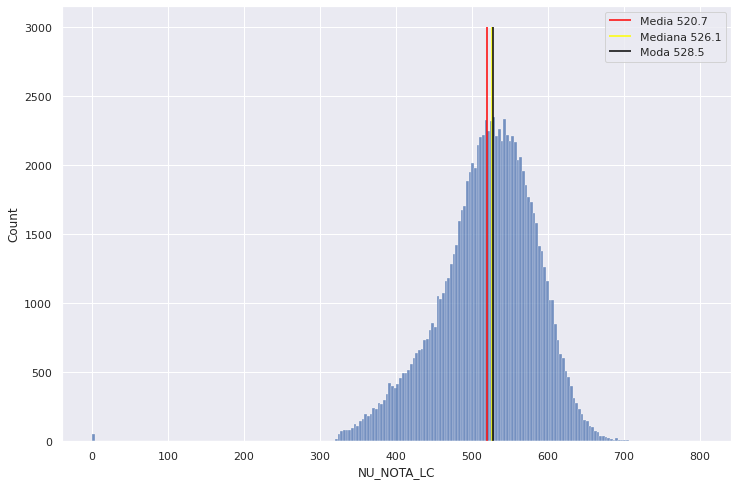

In [44]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_LC")

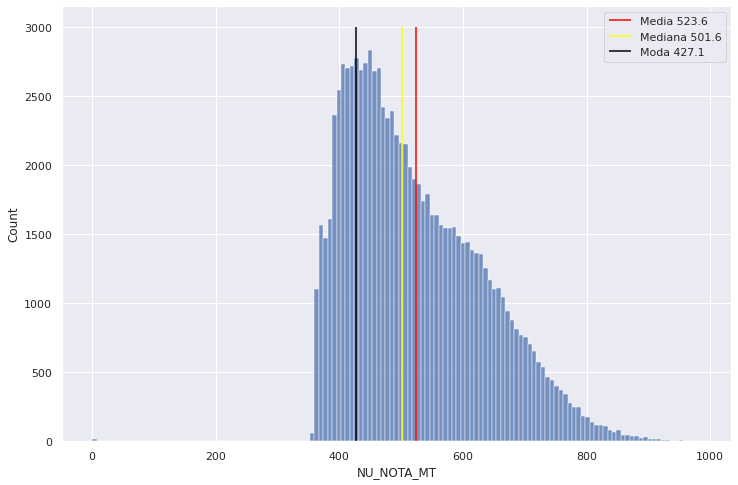

In [45]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_MT")

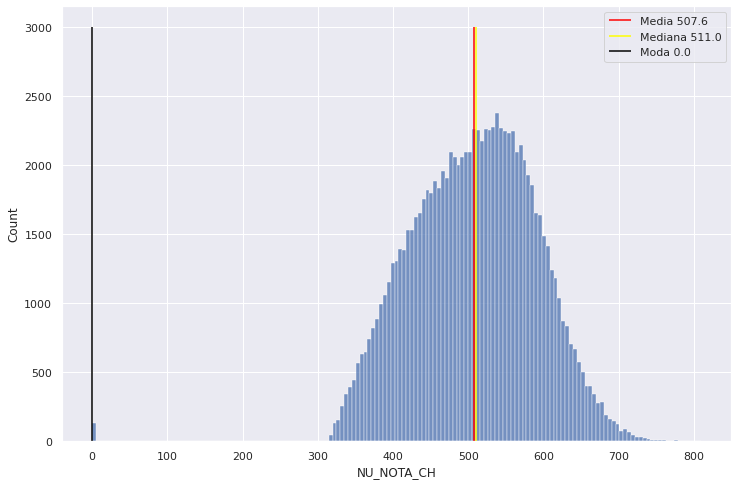

In [46]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_CH")

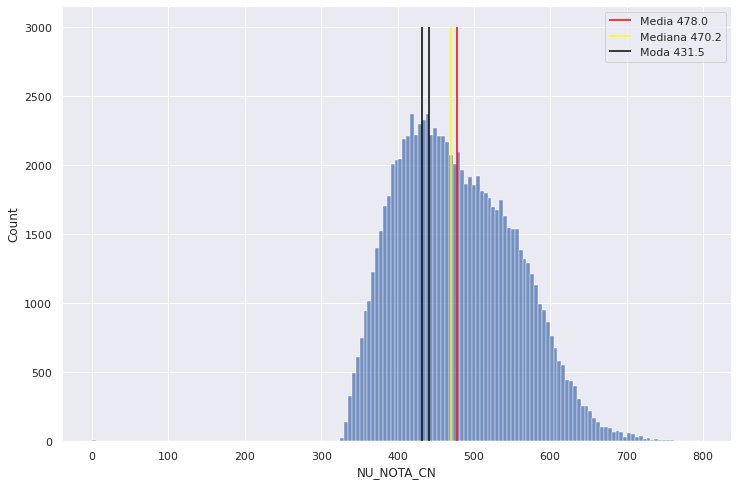

In [47]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_CN")

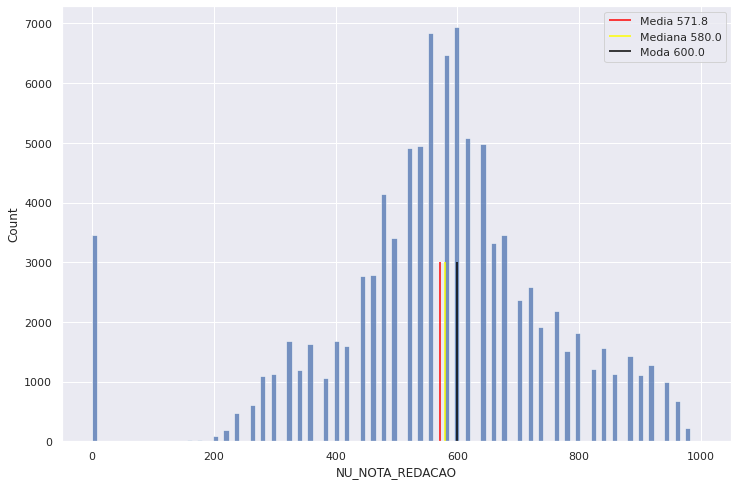

In [48]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_REDACAO")

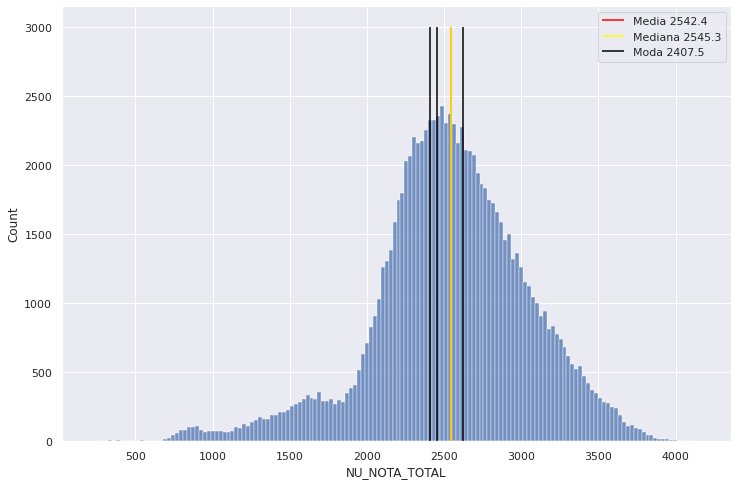

In [49]:
graph_with_MMM(dados_sem_notas_zero, "NU_NOTA_TOTAL")

##Desafio 2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.


In [53]:
def gen_coor_matrix(correlacao):
  mask = np.triu(np.ones_like(correlacao, dtype=bool))
  
  f, ax = plt.subplots(figsize=(11, 9))
  ax.set_title('Matriz de correlação entre as notas dos candidatos por prova')

  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

  plt.show()

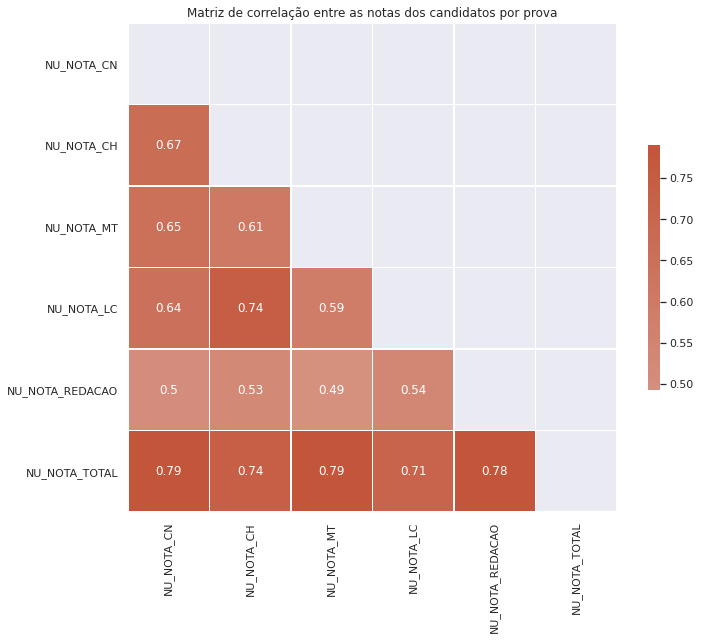

In [54]:
gen_coor_matrix(dados_sem_notas_zero[provas].corr())

##Desafio 3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.


In [57]:
sp_sem_nota_zero = dados_sem_notas_zero.query("SG_UF_RESIDENCIA == 'SP'")

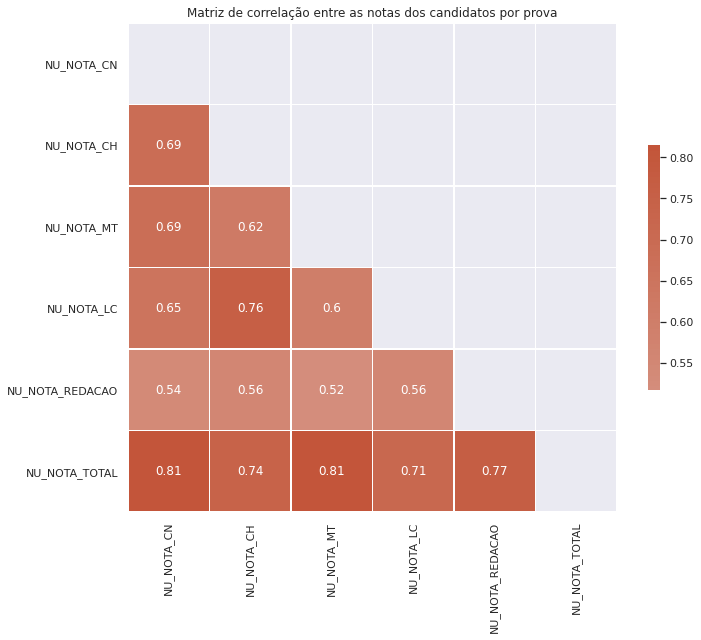

In [58]:
gen_coor_matrix(sp_sem_nota_zero[provas].corr())

In [61]:
#Código retirado de: 'https://colab.research.google.com/drive/1SMpveD7qyrjelIB27Nzv_I77S2QkaHzz?usp=sharing#scrollTo=ckbrcedXXXpJ'
#Autor: Patrick Tapajós Pinto 

def gen_plot(ax, val, df):
  sns.histplot(ax= ax, data=df, x = val, element="poly")
    
  mean = df[val].mean()
  median = df[val].median()
  mode = df[val].mode()[0]

  ax.axvline(mean, color='b', linewidth=1.5, linestyle='--', label='Média: {:.1f}'.format(mean))
  ax.axvline(median, color='r', linewidth=1.5, linestyle='--', label='Mediana: {:.1f}'.format(median))
  ax.axvline(mode, color='y', linewidth=1.5, linestyle='--', label='Moda: {:.1f}'.format(mode))

  ax.set_title("Histograma - {}".format(val))
  
  ax.legend(loc=0)

def gen_describe_on_hist(x_provas, df):
  sns.set()
  N = len(x_provas)
  cols = 2
  rows = int(math.ceil(N / cols))

  gs = gridspec.GridSpec(rows, cols)
  fig = plt.figure(figsize=(24, 20))
  for n in range(N):
    ax = fig.add_subplot(gs[n])
    gen_plot(ax, x_provas[n], df)

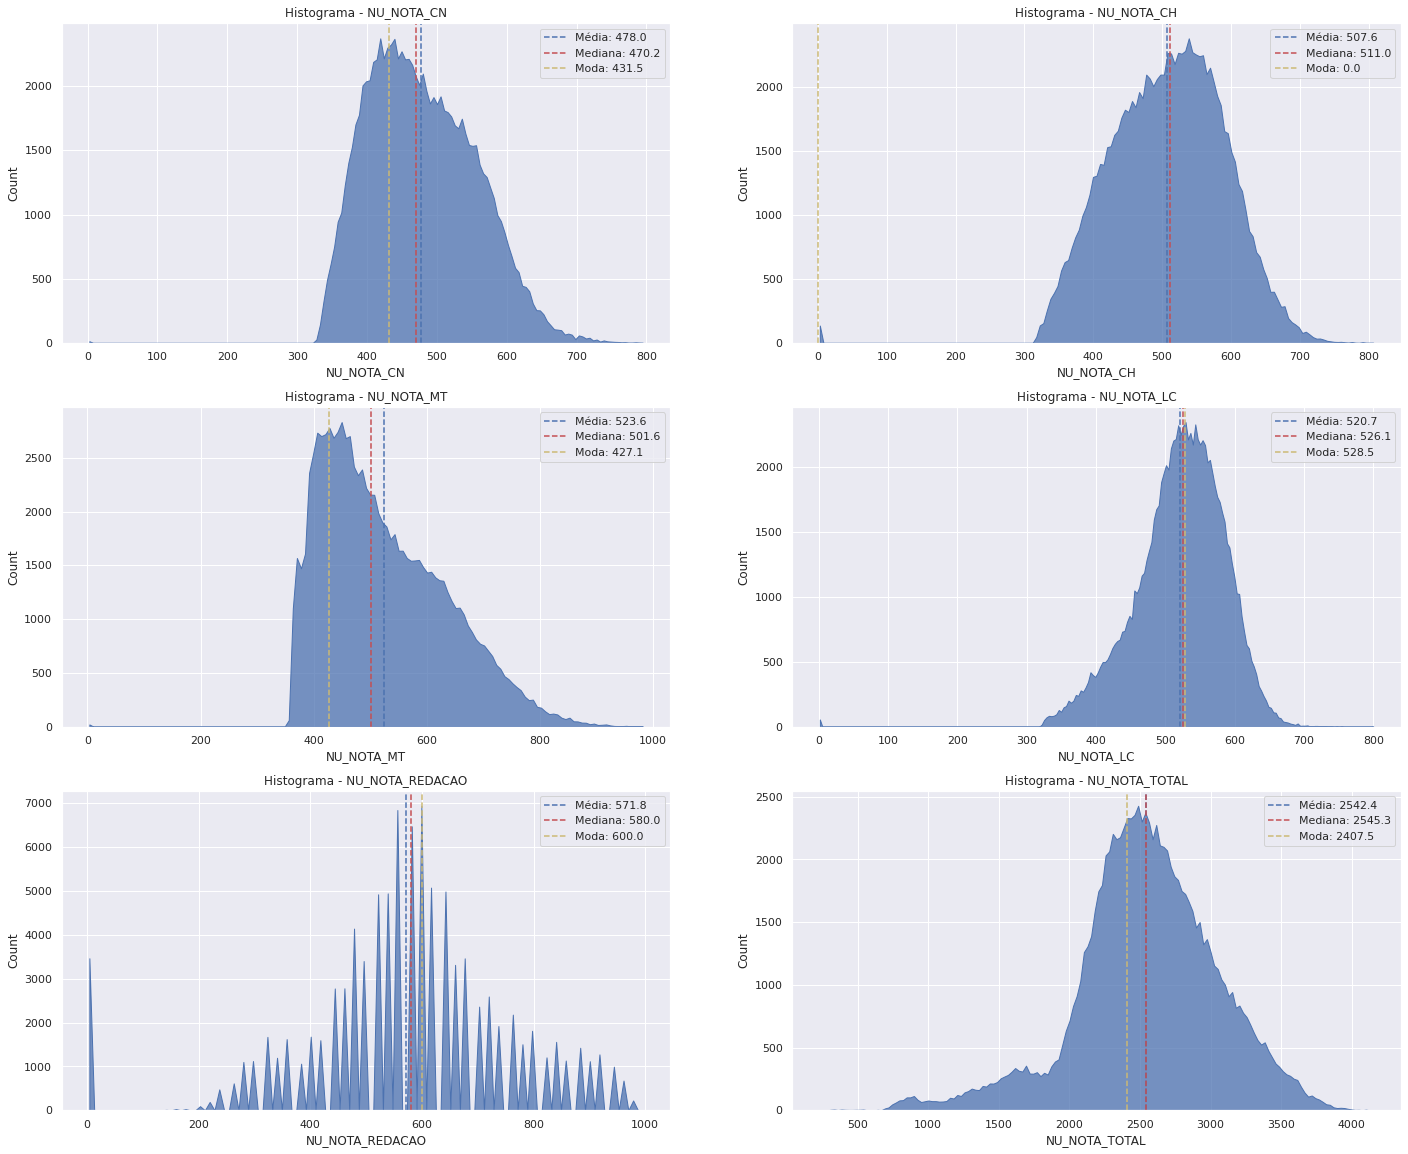

In [62]:
gen_describe_on_hist(provas, dados_sem_notas_zero)

##Desafio 4: Pensar sobre a correlação entre matemática e Linguagens.

##Conteúdo extra retirado de: 'https://colab.research.google.com/drive/1SMpveD7qyrjelIB27Nzv_I77S2QkaHzz?usp=sharing#scrollTo=ckbrcedXXXpJ'
####Autor: Patrick Tapajós Pinto